In [1]:
%matplotlib notebook

from scipy.io import wavfile as wav
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rate, data = wav.read("data/songs/elise2.wav")
rate2, data2 = wav.read("data/generated_songs/elise_no_candidates.wav")
rate3, data3 = wav.read("data/generated_songs/elise_candidates.wav")

In [3]:
data = data[:, 0]
data2 = data2[:, 0]
data3 = data3[:, 0]

In [4]:
length = min(len(data), len(data2), len(data3))
t = np.linspace(0, length / rate, num=length)

<IPython.core.display.Javascript object>


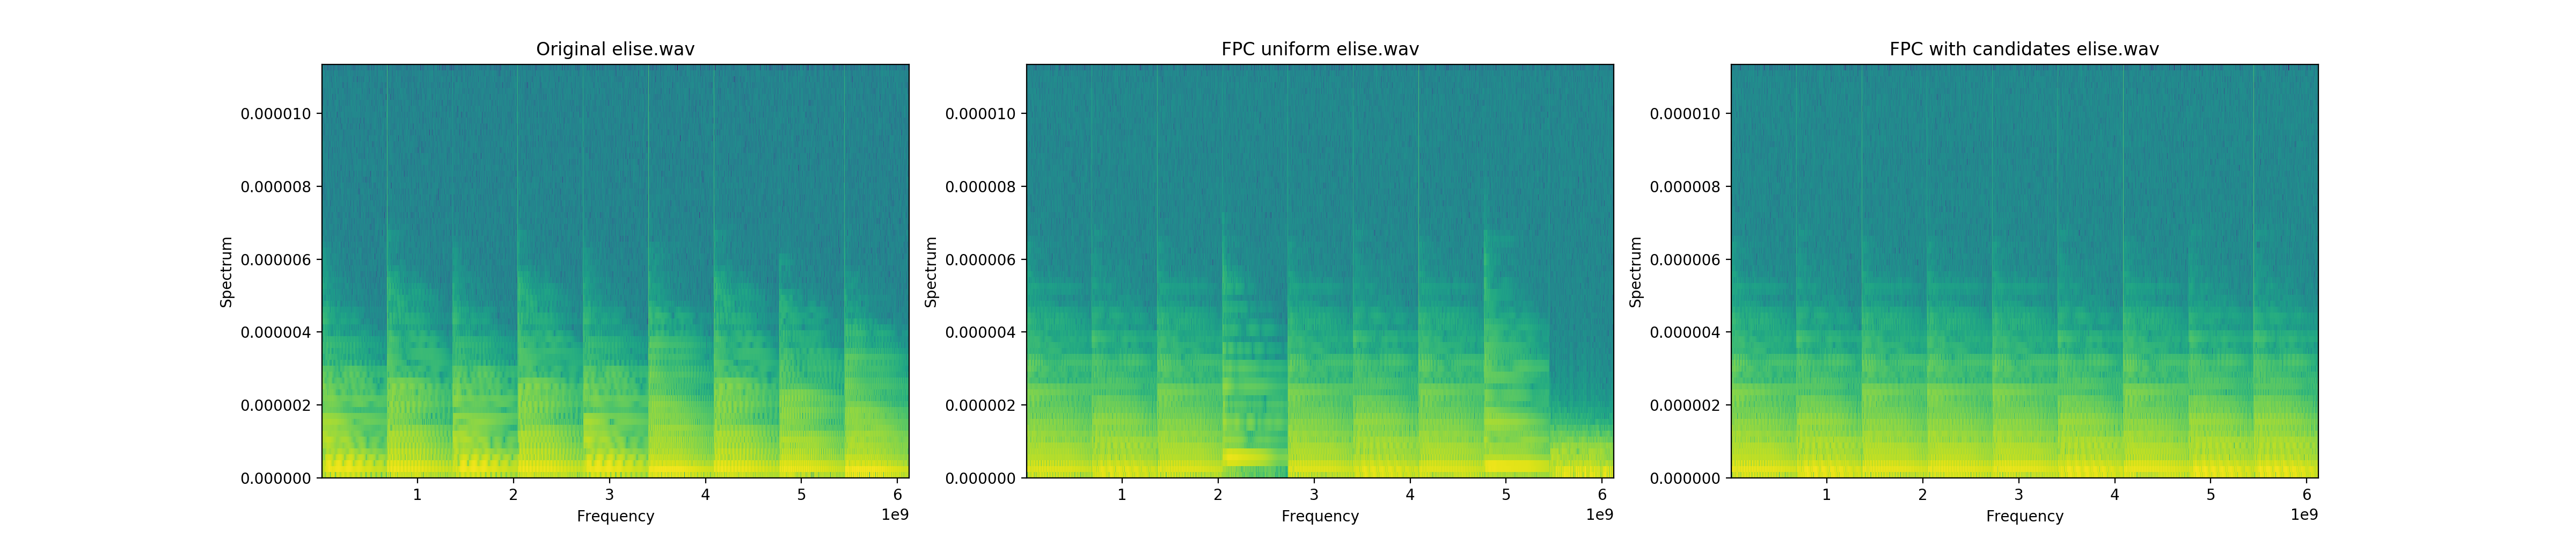

In [5]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(24,5))
ax1.specgram(data[:length], NFFT=length//1000, Fs=1/rate, label="original")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("Spectrum")
ax1.set_title("Original elise.wav")
ax2.specgram(data2[:length], NFFT=length//1000, Fs=1/rate, label="FPC uniform")
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Spectrum")
ax2.set_title("FPC uniform elise.wav")
ax3.specgram(data3[:length], NFFT=length//1000, Fs=1/rate, label="FPC candidates")
ax3.set_xlabel("Frequency")
ax3.set_ylabel("Spectrum")
ax3.set_title("FPC with candidates elise.wav")
plt.show()

<IPython.core.display.Javascript object>


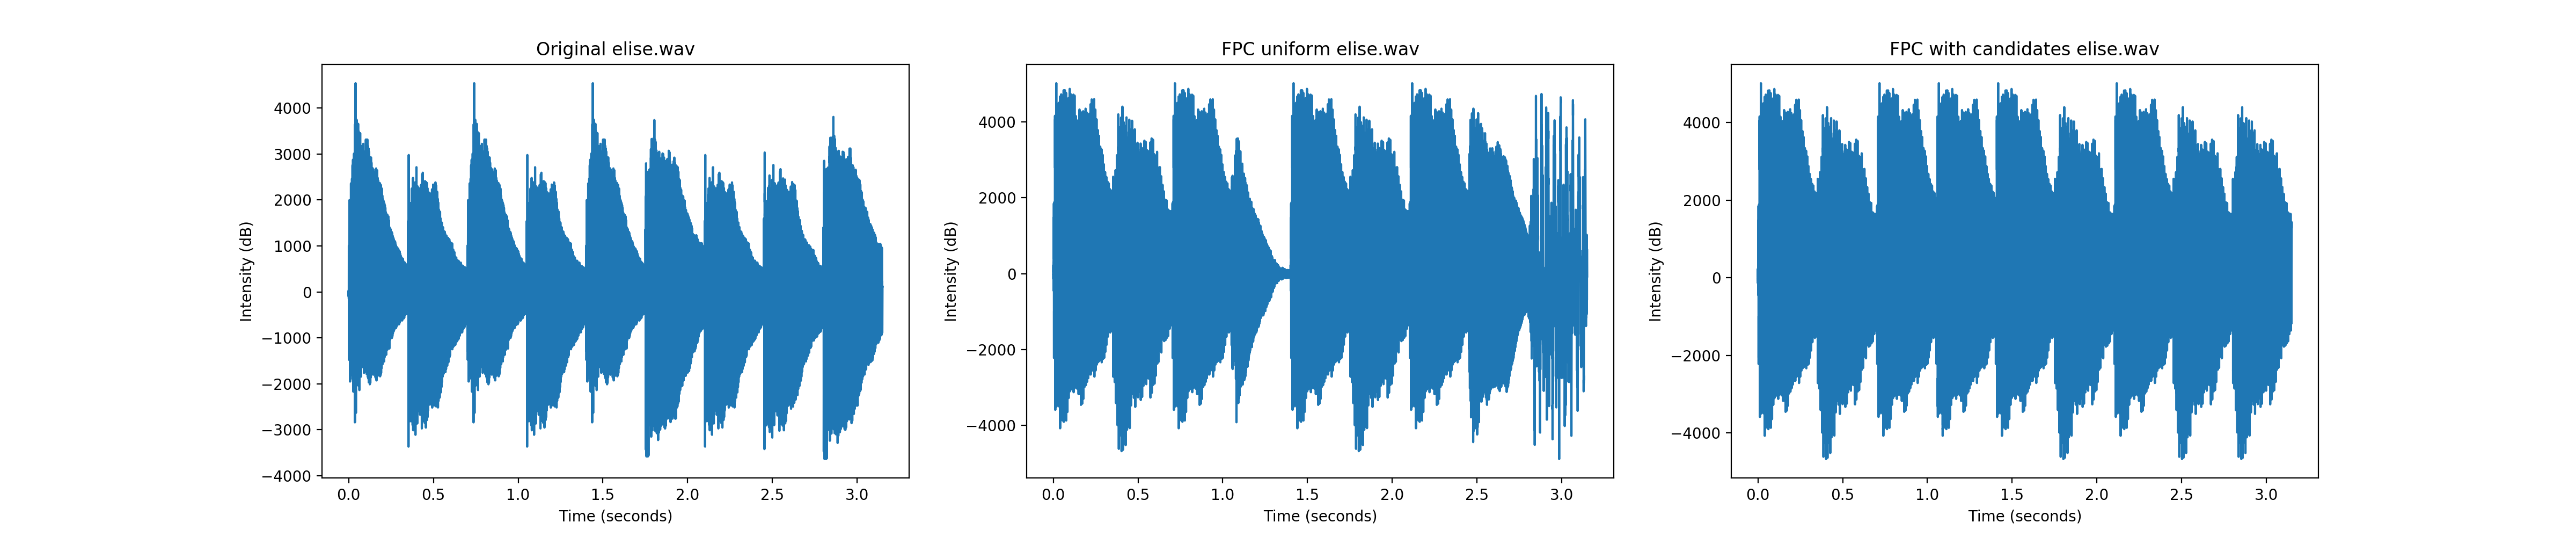

In [8]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(24,5))
ax1.plot(t, data[:length])
ax1.set_xlabel("Time (seconds)")
ax1.set_ylabel("Intensity (dB)")
ax1.set_title("Original elise.wav")
ax2.plot(t, data2[:length])
ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("Intensity (dB)")
ax2.set_title("FPC uniform elise.wav")
ax3.plot(t, data3[:length])
ax3.set_xlabel("Time (seconds)")
ax3.set_ylabel("Intensity (dB)")
ax3.set_title("FPC with candidates elise.wav")
plt.show()

<IPython.core.display.Javascript object>


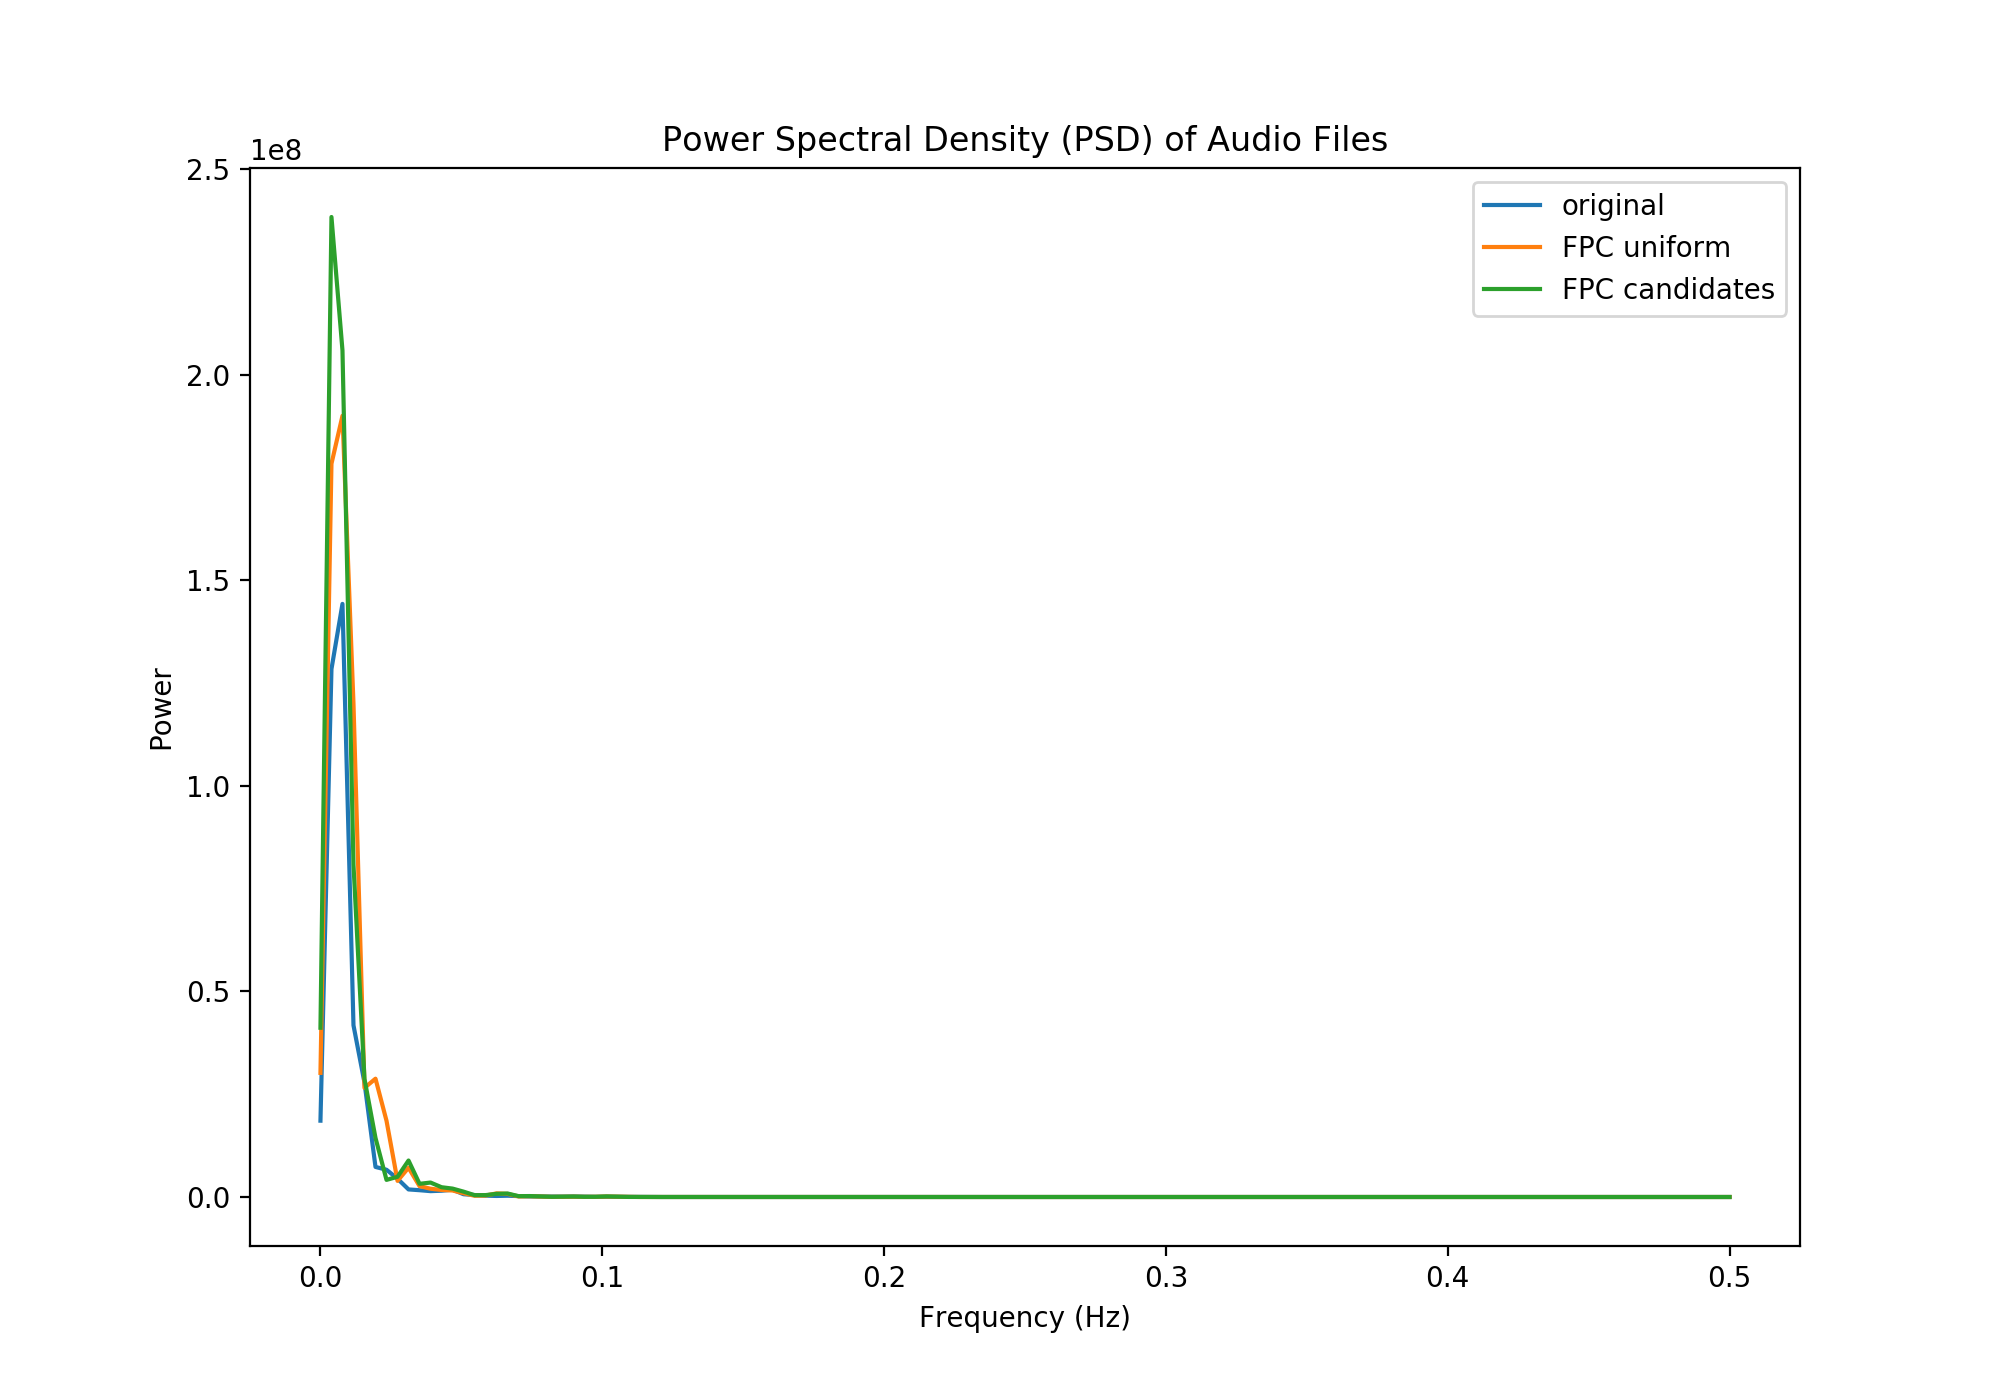

In [7]:
from scipy import signal

plt.figure(figsize=(10, 7))

freqs, psd = signal.welch(data[:length])
plt.plot(freqs, psd, label="original")
plt.ylabel("Power")
plt.xlabel("Frequency (Hz)")
plt.title("Power Spectral Density (PSD) of Audio Files")

freqs, psd = signal.welch(data2[:length])
plt.plot(freqs, psd, label="FPC uniform")

freqs, psd = signal.welch(data3[:length])
plt.plot(freqs, psd, label="FPC candidates")

plt.legend()

plt.show()